# AmazonReviews KNN Assignment

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd #for data frames
import numpy as np #numpy array operations
import nltk #natural lang processing, for processing text
import string
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import pickle
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pickle_in=open("cleanedData.pickle","rb")
final = pickle.load(pickle_in)

In [3]:
pickle_in = open("BOW_tfidf_avgW2V_TfidfW2V.pickle","rb")
count_vect = pickle.load(pickle_in) #BOW
final_counts = pickle.load(pickle_in) #BOW

tf_idf_vect = pickle.load(pickle_in) #TFIDF
final_tf_idf = pickle.load(pickle_in) #TFIDF
features = pickle.load(pickle_in) #TFIDF

w2v_model = pickle.load(pickle_in) #w2v
words = pickle.load(pickle_in) #w2v

sent_vectors = pickle.load(pickle_in) #avg W2V

C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
# Weighted TF_IDF W2V
pickle_in =open("WiightedTfidfW2V.pickle","rb")
tfidf_sent_vectors = pickle.load(pickle_in)

In [5]:
final.shape

(364171, 11)

In [6]:
final_counts.shape

(364171, 115281)

In [7]:
scores = final['Score'].get_values()

In [8]:
li = lambda x: 1 if x=='positive'  else 0
final_scores = []
for i in range(0,364171):
    final_scores.append(li(scores[i]))

# BOW K-Fold CV

In [18]:
bow_knn_dataset = pd.DataFrame(final_counts[0:1000].toarray())

In [19]:
bow_knn_dataset['Score'] = pd.Series(final_scores[0:1000])

In [20]:
bow_knn_sample = bow_knn_dataset

In [21]:
bow_knn_sample.head()

,0,1,2,3,4,5,6,7,8,9,...,115272,115273,115274,115275,115276,115277,115278,115279,115280,Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:

# Total data frame
#x = np.array(bow_knn_sample.iloc[:,0:115283])

x = final_counts[0:1000]

# this is only Score/rating  of data
#y = np.array(bow_knn_sample['Score'])

y = final_scores[0:1000]

In [26]:
# Total data frame
x = np.array(bow_knn_sample.iloc[:,0:115283])



# this is only Score/rating  of data
y = np.array(bow_knn_sample['Score'])



In [44]:
#splitting the train and test data

x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.3, random_state=0)


In [45]:
#x_1 = np.array(x_1)

y_1 = np.array(y_1)

#x_test = np.array(x_test)

y_test = np.array(y_test)


## k-fold Cross Validation Using Time Based Split

In [46]:
from sklearn.model_selection import TimeSeriesSplit

def k_fold_cross_validation(x_mat,y_vec):
    li = list(range(0,14))
    
    #creating odd list of vals for 'k'
    neighbors = list(filter(lambda x: x%2 != 0,li))

    #empty list to hold CV scores/accuracy
    cv_scores = []

    
    #performing k-fold cross validation with Times Based Split
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
        tscv = TimeSeriesSplit(n_splits=5)
        acc_sum=0
        cnt=0
        for train_index, test_index in tscv.split(x_1):
            X_train, X_test = x_1[train_index], x_1[test_index]
            Y_train, Y_test = y_1[train_index], y_1[test_index]
            knn.fit(X_train,Y_train)
            pred = knn.predict(X_test)
            acc = accuracy_score(Y_test, pred, normalize=True )*float(100)
            acc_sum=acc_sum+acc
            cnt=cnt+1
        cv_scores.append(acc_sum/cnt)
            
            
   
    # determining best k
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, cv_scores)

    for xy in zip(neighbors, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy Percentage')
    plt.show()

    print("the Accuracy for each k value is : ", np.round(cv_scores,3))
    print('*********************************************************************')
    print("optimal k value is: ",optimal_k)
    return optimal_k;

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:212: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "



The optimal number of neighbors is 5.


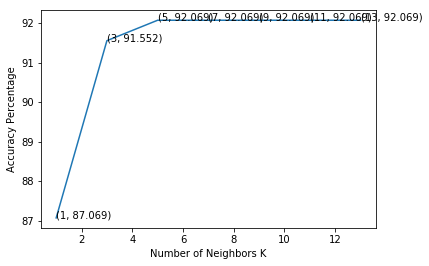

the Accuracy for each k value is :  [87.069 91.552 92.069 92.069 92.069 92.069 92.069]
*********************************************************************
optimal k value is:  5


In [47]:
optim_k_val = k_fold_cross_validation(x_1,y_1)

In [48]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optim_k_val, acc))


The accuracy of the knn classifier for k = 5 is 93.000000%


# TF_IDF K-fold CV

In [33]:
final_tf_idf.shape

(364171, 2910192)

In [34]:
tf_idf_dataset = pd.DataFrame(final_tf_idf[0:1000].toarray())

In [35]:
tf_idf_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,2910182,2910183,2910184,2910185,2910186,2910187,2910188,2910189,2910190,2910191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
tf_idf_dataset[2910192] =pd.Series(final_scores[0:1000])

In [37]:
tf_idf_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,2910183,2910184,2910185,2910186,2910187,2910188,2910189,2910190,2910191,2910192
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [38]:
#del tf_idf_sample

In [39]:
tf_idf_sample = tf_idf_dataset[0:120]

In [40]:

# Total data frame
x = np.array(tf_idf_sample.iloc[:,0:2910194])

# this is only Score/rating  of data
y = np.array(tf_idf_sample[2910192])

In [41]:
#splitting the train and test data

x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.3, random_state=0)



The optimal number of neighbors is 1.


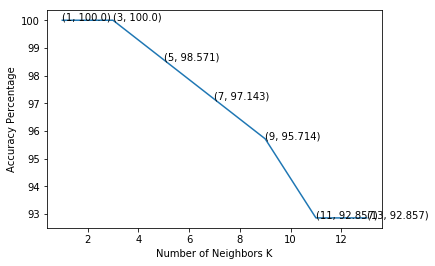

the Accuracy for each k value is :  [100.    100.     98.571  97.143  95.714  92.857  92.857]
*********************************************************************
optimal k value is:  1


In [42]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [43]:
knn_optimal = KNeighborsClassifier(n_neighbors=opt_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 1 is 100.000000%


# W2V K-Fold CV

In [38]:
# converting our list of sentences obtained by W2V to data frame
sentence_vec_df = pd.DataFrame(sent_vectors)

In [39]:
sentence_vec_df.shape

(364171, 50)

In [40]:
len(final_scores)

364171

In [41]:
# Appending scores col to df in the name of 50(col name)
sentence_vec_df[50] = pd.Series(final_scores)

In [42]:
sentence_vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.470370,0.089819,-0.932643,0.078636,-0.489576,-0.003041,-0.508256,0.053643,-0.002099,-0.593551,...,-0.248097,0.260498,0.253784,0.264965,-1.380215,-0.715204,0.363380,0.136767,-0.764389,1
1,0.379767,0.136434,-0.950553,0.471311,-1.138942,0.802141,-0.579295,0.520531,0.376921,-0.363079,...,-0.335022,-0.805269,-0.044389,0.487194,-1.128237,-0.292659,0.469432,-0.092853,-0.754410,1
2,0.505154,0.327262,-1.534104,0.359884,-1.418530,0.005621,0.124076,0.277993,0.083654,-1.251413,...,0.315080,0.688163,0.547938,0.695507,-1.299314,-0.713692,0.782679,0.333123,-0.249831,1
3,0.437835,0.145117,-0.788995,0.350910,-0.847932,0.188851,-0.449225,-0.126257,0.036682,-0.282203,...,-0.108464,-0.396189,0.108855,0.590910,-1.171183,-0.702059,-0.002717,0.100347,-0.226802,1
4,0.526293,0.086541,-0.959209,0.275098,-0.777519,-0.190007,-0.015043,0.227957,0.386135,-0.843487,...,0.225352,0.313352,-0.038271,0.651537,-1.004038,-1.101443,0.515672,0.398562,-0.200929,1


In [43]:
sent_vec_sample = sentence_vec_df[0:10000]
#sentence_vec_df[sentence_vec_df[50]==None]

In [44]:
sent_vec_sample.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.470370,0.089819,-0.932643,0.078636,-0.489576,-0.003041,-0.508256,0.053643,-0.002099,-0.593551,...,-0.248097,0.260498,0.253784,0.264965,-1.380215,-0.715204,0.363380,0.136767,-0.764389,1
1,0.379767,0.136434,-0.950553,0.471311,-1.138942,0.802141,-0.579295,0.520531,0.376921,-0.363079,...,-0.335022,-0.805269,-0.044389,0.487194,-1.128237,-0.292659,0.469432,-0.092853,-0.754410,1
2,0.505154,0.327262,-1.534104,0.359884,-1.418530,0.005621,0.124076,0.277993,0.083654,-1.251413,...,0.315080,0.688163,0.547938,0.695507,-1.299314,-0.713692,0.782679,0.333123,-0.249831,1
3,0.437835,0.145117,-0.788995,0.350910,-0.847932,0.188851,-0.449225,-0.126257,0.036682,-0.282203,...,-0.108464,-0.396189,0.108855,0.590910,-1.171183,-0.702059,-0.002717,0.100347,-0.226802,1
4,0.526293,0.086541,-0.959209,0.275098,-0.777519,-0.190007,-0.015043,0.227957,0.386135,-0.843487,...,0.225352,0.313352,-0.038271,0.651537,-1.004038,-1.101443,0.515672,0.398562,-0.200929,1


In [45]:
sent_vec_sample.shape

(10000, 51)

In [46]:
# Total data frame
x = np.array(sent_vec_sample.iloc[:,0:51])

# this is only Score/rating  of data
y = np.array(sent_vec_sample[50])

In [47]:
#splitting the train and test data

x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.2, random_state=0)


The optimal number of neighbors is 3.


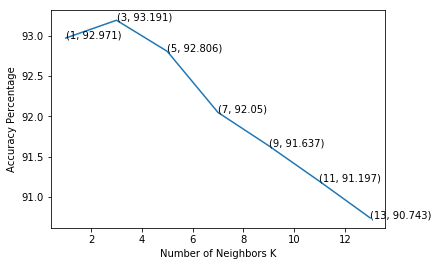

the Accuracy for each k value is :  [92.971 93.191 92.806 92.05  91.637 91.197 90.743]
*********************************************************************
optimal k value is:  3


In [48]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [49]:
knn_optimal = KNeighborsClassifier(n_neighbors=opt_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

prediction = knn_optimal.predict(x_test)

acc = accuracy_score(y_test, prediction) * 100

print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 3 is 93.350000%


# Weighted TF-IDF W2V K-Fold CV

In [81]:
len(tfidf_sent_vectors)

1000

In [82]:
tfidf_sent_vec_df = pd.DataFrame(tfidf_sent_vectors[0:250])

In [83]:
tfidf_sent_vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.639972,0.228737,-0.478446,-0.025983,-0.204506,0.115724,-0.651446,0.115058,0.479241,-0.333295,...,0.223526,0.031623,0.405571,0.137960,0.424301,-0.762108,-0.538821,0.206862,0.256278,-0.528564
1,0.597142,0.977064,-2.078238,1.469541,-0.760195,0.199414,-0.084249,0.677741,1.079856,-2.042121,...,0.608248,0.175740,0.291414,0.097637,2.069572,-1.736750,-0.667335,1.489277,-1.102863,0.392494
2,0.467972,-0.782219,-1.611445,0.204595,-1.113786,-0.578520,0.538224,0.553767,-1.625051,-2.481325,...,-0.070859,1.469460,0.831846,-0.013604,1.392836,-2.461882,0.182287,1.982098,-0.964890,0.359775
3,0.192473,1.329472,-1.137030,0.785490,-0.932510,-0.369897,-0.866361,0.546366,-1.977619,-1.133187,...,0.145662,-0.444272,0.107701,0.219880,0.522319,-2.161988,-0.878698,1.604029,0.237131,0.057109
4,0.704053,-0.324343,-2.468459,0.894846,-1.036197,0.976732,0.094787,-0.210362,-0.991418,-1.556582,...,-0.030946,-0.620328,0.619873,0.414919,1.901598,-1.664423,-0.695741,1.545660,-0.718486,0.765077


In [84]:
tfidf_sent_vec_df[50] = pd.Series(final_scores[0:250])

In [85]:
tfidf_sent_vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.639972,0.228737,-0.478446,-0.025983,-0.204506,0.115724,-0.651446,0.115058,0.479241,-0.333295,...,0.031623,0.405571,0.137960,0.424301,-0.762108,-0.538821,0.206862,0.256278,-0.528564,1
1,0.597142,0.977064,-2.078238,1.469541,-0.760195,0.199414,-0.084249,0.677741,1.079856,-2.042121,...,0.175740,0.291414,0.097637,2.069572,-1.736750,-0.667335,1.489277,-1.102863,0.392494,1
2,0.467972,-0.782219,-1.611445,0.204595,-1.113786,-0.578520,0.538224,0.553767,-1.625051,-2.481325,...,1.469460,0.831846,-0.013604,1.392836,-2.461882,0.182287,1.982098,-0.964890,0.359775,1
3,0.192473,1.329472,-1.137030,0.785490,-0.932510,-0.369897,-0.866361,0.546366,-1.977619,-1.133187,...,-0.444272,0.107701,0.219880,0.522319,-2.161988,-0.878698,1.604029,0.237131,0.057109,1
4,0.704053,-0.324343,-2.468459,0.894846,-1.036197,0.976732,0.094787,-0.210362,-0.991418,-1.556582,...,-0.620328,0.619873,0.414919,1.901598,-1.664423,-0.695741,1.545660,-0.718486,0.765077,1


In [86]:
x = np.array(tfidf_sent_vec_df.iloc[:,0:51])

y = np.array(tfidf_sent_vec_df[50]) 

In [87]:
x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.3, random_state = 0)

In [88]:
len(y_test)

75


The optimal number of neighbors is 3.


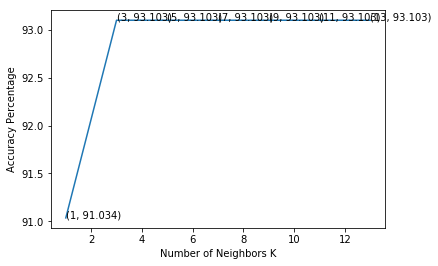

the Accuracy for each k value is :  [91.034 93.103 93.103 93.103 93.103 93.103 93.103]
*********************************************************************
optimal k value is:  3


In [89]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [90]:
knn_optimal = KNeighborsClassifier(n_neighbors=3)

knn_optimal.fit(x_1,y_1)

pred = knn_optimal.predict(x_test)

acc = accuracy_score(y_test,pred) * 100

print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 3 is 94.666667%


# Summary:<br>
After performing K-Fold Cross Validation here are the results of diff techniques:<br>

1) BOW -> k = 3 acc= 93% <br>
2) TF-IDF -> k = 1 acc = 100% (as we have considered less amt of data)<br>
3) W2V -> k = 5 acc = 93.35%<br>
4) Weighted TF-IDF W2V -> k = 3 acc = 94.67%